<a href="https://colab.research.google.com/github/Value1965/CulturalCode/blob/main/%D0%9A%D1%83%D0%BB%D1%8C%D1%82%D1%83%D1%80%D0%BD%D1%8B%D0%B9_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Загрузим нужные библиотеки

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np 
from tqdm import tqdm

%matplotlib inline
!pip install navec
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
from navec import Navec
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-10-04 03:08:20--  https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53012480 (51M) [application/x-tar]
Saving to: ‘navec_hudlit_v1_12B_500K_300d_100q.tar’

navec_hudlit_v1_12B 100%[===================>]  50.56M  16.5MB/s    in 3.1s    

2022-10-04 03:08:24 (16.5 MB/s) - ‘navec_hudlit_v1_12B_500K_300d_100q.tar’ saved [53012480/53012480]



In [3]:
path = '/content/navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)

In [4]:
df_train = pd.read_csv("/content/drive/MyDrive/hacks_ai_2022/Вологда/train_dataset_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/hacks_ai_2022/Вологда/test_dataset_test.csv")

## Рассмотрим датасет по ближе

In [5]:
df_train.head(10)

,RecordNo,Название книги,Автор,Ссылка на литрес,Рейтинг,Количество оценок,Количество отзывов,Имя читателя,Оценка книги читателем (из 5 баллов),Отзыв,Лайки на отзыв,Дислайки на отзыв,Релевантность,Таксономия релевантные,Таксономия не релевантные,Длина отзыва,Ценности
0,6145,Зулейха открывает глаза,Гузель Яхина,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.7,3922,408,Айгуль Ляпина,5.0,Рекомендую книгу в прочтению/прослушиванию. Ес...,0,3,0,0,0,0,0
1,7006,Зулейха открывает глаза,Гузель Яхина,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.6,24719,2103,Olga T,5.0,"Удивительно, что сейчас возникает ТАКАЯ литера...",0,1,0,0,0,0,1
2,1124,Дети мои,Гузель Яхина,https://www.litres.ru/guzel-yahina/deti-moi/,4.4,8032,702,Кирилл Чириков,5.0,"Душевно, жизненно, чувственно, проникновенно!!...",0,0,0,1,0,0,1
3,4716,ПОСТ,Дмитрий Глуховский,https://www.litres.ru/dmitriy-gluhovskiy/post/,3.9,430,48,Kimetov Oleg,5.0,Очень понравилось. Причем понравилось больше «...,2,7,0,1,0,0,0
4,2946,ПОСТ,Дмитрий Глуховский,https://www.litres.ru/dmitriy-gluhovskiy/post-...,4.4,832,113,Сергей Никитин,5.0,Круто. Автор и он же чтец – гений. Прослушал н...,1,0,0,0,0,0,0
5,592,Санькя,Захар Прилепин,https://www.litres.ru/zahar-prilepin/sankya-16...,4.1,274,37,Кирилл К,3.0,"Вообще Прилепин пишет хорошо. Хорошо читается,...",0,1,0,0,0,0,0
6,7635,Обитель,Захар Прилепин,https://www.litres.ru/zahar-prilepin/obitel/,4.5,1916,171,Сергей Киряков,5.0,"Это вторая книга атора, которую я прочитал. Ни...",0,0,0,1,0,0,1
7,7226,Батюшки мои,Валентин Курбатов,https://www.litres.ru/valentin-kurbatov/batush...,4.7,3,6,Елена Тимофеева,NaN,церковь в начале 90-х В центре повествования П...,1,1,1,1,0,0,1
8,6194,Зулейха открывает глаза,Гузель Яхина,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.7,3922,408,yuliya_bv,5.0,Роман произвёл очень сильное впечатление. Авто...,1,3,1,1,0,0,1
9,3276,Текст,Дмитрий Глуховский,https://www.litres.ru/dmitriy-gluhovskiy/tekst/,4.4,7276,622,shilina.anna,5.0,"На одном дыхании. Без соплей, без чернухи, как...",0,1,0,0,0,0,1


In [6]:
df_train.shape

(4839, 17)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4839 entries, 0 to 4838
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RecordNo                              4839 non-null   int64  
 1   Название книги                        4839 non-null   object 
 2   Автор                                 4839 non-null   object 
 3   Ссылка на литрес                      4839 non-null   object 
 4   Рейтинг                               4839 non-null   float64
 5   Количество оценок                     4839 non-null   int64  
 6   Количество отзывов                    4839 non-null   int64  
 7   Имя читателя                          4839 non-null   object 
 8   Оценка книги читателем (из 5 баллов)  4070 non-null   float64
 9   Отзыв                                 4839 non-null   object 
 10  Лайки на отзыв                        4839 non-null   int64  
 11  Дислайки на отзыв

## Загрузим стоп - слова.

In [8]:
import nltk
nltk.download('stopwords')


from nltk.corpus import stopwords
words_stop = stopwords.words('russian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##Загрузим лексический анализатор

In [9]:
!pip install pymorphy2
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
import re
import string
import numpy as np

ch=navec['непринужденность']
ch=navec['человека']
zero_word=np.zeros_like(ch)


def sentence_embedding(s):
  sum_word=zero_word.copy()
  s_list = re.findall(r'\b\w+\b', s)
  for w in s_list:
    w=w.lower()
    p = morph.parse(w)[0]
  
    w=p.normal_form
    w = w.replace('ё','е')
    if w not in words_stop:
      if w in navec:
        sum_word=sum_word+navec[w]
  sum_word=sum_word/len(s_list)
  return sum_word





Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 1.7 MB/s 
     |████████████████████████████████| 8.2 MB 13.5 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=9900ecaf05cceba5f41d11c1a6490210e938d5b58d085ab2dbcb141b4de16eb6
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt


## Построение эмбединга культурного кода

In [10]:
ch.shape

(300,)

In [11]:
#'жизнь,достоинство, права и свободы человека, патриотизм, гражданственность,служение Отечеству и ответственность за его судьбу, высокие нравственные идеалы, крепкая семья, созидательный труд, приоритет духовного над материальным, гуманизм, милосердие, справедливость, коллективизм,взаимопомощь и взаимоуважение, историческая память и преемственность поколений, единство народов России'
culturalCode = 'жизнь человек,достоинство человек, право человек,свобода человек,патриотизм, гражданственность,служение отечество,ответственность судьба отечество,высокий нравственный идеал, крепкий семья, созидательный труд,приоритет духовное материальное, гуманизм, милосердие, справедливость, коллективизм,взаимопомощь, взаимоуважение, исторический память , преемственность поколение, единство народ Россия'
culturalList = culturalCode.split(',')

culturalEmbeddingList=[]
valueLengthList=[]

for wc in culturalList:
  wc=wc.lower()
  e=zero_word
  #print(wc)
  wcl=wc.strip().split(' ')
  for w in wcl:
    p = morph.parse(w)[0]
    w = p.normal_form
    e=e+navec[w]
  culturalEmbeddingList.append(e)
  valueLengthList.append(len(wcl))
sumCulturalEmbedding=np.sum(culturalEmbeddingList, axis=0)
sumCulturalEmbedding.shape
avgCulturalEmbedding=sumCulturalEmbedding/len(culturalEmbeddingList)

## Добавим новых признаков

In [12]:
def get_value(s):
  v = 0
  
  s_list = re.findall(r'\b\w+\b', s)
  for i in range(len(culturalEmbeddingList)):
    ewc = culturalEmbeddingList[i]
    similarityList=[]
    for w in s_list:
      w=w.lower()
      p = morph.parse(w)[0]
   
      w=p.normal_form
      w = w.replace('ё','е')
      if w not in words_stop:
        if w in navec:
          ew = navec[w]
        
          
          cs=cosine_similarity(ew.reshape(1,-1),ewc.reshape(1,-1))[0][0]
          
          similarityList.append(cs)
    similarityList.sort(reverse=True)
    if len(similarityList)>2:
      vn=0
      for j in range(valueLengthList[i]):
        vn=vn+similarityList[j]
      vn = vn / valueLengthList[i]
    else:
      vn=similarityList[0]
    if vn>v:

      v=vn
  return v


def get_culturalcode(s):
  e=sentence_embedding(s)
  p_e=avgCulturalEmbedding
  return cosine_similarity(e.reshape(1,-1),p_e.reshape(1,-1))[0][0]



In [13]:
def add_features(df):
  df["len_reviews"] = df["Отзыв"].map(len)

 

  df["Соответствие коду"] = df["Отзыв"].apply(get_culturalcode)
  df["Наличие ценности"] = df["Отзыв"].apply(get_value)
  df = df.fillna(0)
  return df

df_train = add_features(df_train)

In [14]:
df_train

,RecordNo,Название книги,Автор,Ссылка на литрес,Рейтинг,Количество оценок,Количество отзывов,Имя читателя,Оценка книги читателем (из 5 баллов),Отзыв,Лайки на отзыв,Дислайки на отзыв,Релевантность,Таксономия релевантные,Таксономия не релевантные,Длина отзыва,Ценности,len_reviews,Соответствие коду,Наличие ценности
0,6145,Зулейха открывает глаза,Гузель Яхина,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.7,3922,408,Айгуль Ляпина,5.0,Рекомендую книгу в прочтению/прослушиванию. Ес...,0,3,0,0,0,0,0,157,0.234113,0.488613
1,7006,Зулейха открывает глаза,Гузель Яхина,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.6,24719,2103,Olga T,5.0,"Удивительно, что сейчас возникает ТАКАЯ литера...",0,1,0,0,0,0,1,283,0.456540,0.672787
2,1124,Дети мои,Гузель Яхина,https://www.litres.ru/guzel-yahina/deti-moi/,4.4,8032,702,Кирилл Чириков,5.0,"Душевно, жизненно, чувственно, проникновенно!!...",0,0,0,1,0,0,1,278,0.623444,0.520586
3,4716,ПОСТ,Дмитрий Глуховский,https://www.litres.ru/dmitriy-gluhovskiy/post/,3.9,430,48,Kimetov Oleg,5.0,Очень понравилось. Причем понравилось больше «...,2,7,0,1,0,0,0,342,0.478598,0.441867
4,2946,ПОСТ,Дмитрий Глуховский,https://www.litres.ru/dmitriy-gluhovskiy/post-...,4.4,832,113,Сергей Никитин,5.0,Круто. Автор и он же чтец – гений. Прослушал н...,1,0,0,0,0,0,0,177,0.421581,0.475271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4834,1196,Дети мои,Гузель Яхина,https://www.litres.ru/guzel-yahina/deti-moi/,4.4,8032,702,417504557,4.0,Ещё один замечательный роман Гузель Яхиной! По...,0,0,0,0,0,0,0,149,0.249179,0.350266
4835,1810,Авиатор,Евгений Водолазкин,https://www.litres.ru/evgeniy-vodolazkin/aviator/,4.5,3551,260,Viktoria Steinbach,0.0,Как всегда у Водолазкина – увлекательнейший сю...,0,1,1,1,0,0,1,468,0.529078,0.469880
4836,3220,Текст,Дмитрий Глуховский,https://www.litres.ru/dmitriy-gluhovskiy/tekst...,4.5,1923,246,AnVer,5.0,"Мрачно, грустно. Давно такого не читала и хват...",1,2,0,0,1,0,0,148,0.266024,0.407522
4837,4480,Зулейха открывает глаза,Гузель Яхина,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.6,24719,2103,Мария Перешивко,5.0,Очень интересная книга! Как будто очутилась в ...,0,1,0,0,0,0,0,139,0.316819,0.409608


In [15]:
df_train[df_train['Ценности']==1][['Отзыв','Ценности','Наличие ценности','RecordNo']].head(30)

,Отзыв,Ценности,Наличие ценности,RecordNo
1,"Удивительно, что сейчас возникает ТАКАЯ литера...",1,0.672787,7006
2,"Душевно, жизненно, чувственно, проникновенно!!...",1,0.520586,1124
6,"Это вторая книга атора, которую я прочитал. Ни...",1,0.837881,7635
7,церковь в начале 90-х В центре повествования П...,1,0.839078,7226
8,Роман произвёл очень сильное впечатление. Авто...,1,0.480657,6194
9,"На одном дыхании. Без соплей, без чернухи, как...",1,0.505729,3276
10,Потрясающая книга! Прочитав и перечитав всю Ул...,1,0.465627,5321
11,Начал знакомство с творчеством Пелевина с этой...,1,0.548906,3383
12,"“Прощание с Матёрой” – книга, которую многие м...",1,0.839078,80
13,"Первая часть книги – там, где национальный кол...",1,0.674867,4990


In [16]:
df_train[df_train['Ценности']==0][['Отзыв','Ценности','Наличие ценности','RecordNo']].head(30)

,Отзыв,Ценности,Наличие ценности,RecordNo
0,Рекомендую книгу в прочтению/прослушиванию. Ес...,0,0.488613,6145
3,Очень понравилось. Причем понравилось больше «...,0,0.441867,4716
4,Круто. Автор и он же чтец – гений. Прослушал н...,0,0.475271,2946
5,"Вообще Прилепин пишет хорошо. Хорошо читается,...",0,0.525078,592
15,Спасибо автору прежде всего за прекрасный русс...,0,0.641661,6554
16,"Очень тонкая и чуткая книга, полная страданий ...",0,0.639298,4843
20,"Прочла в первый раз два года назад, тогда рома...",0,0.535746,6052
21,впечатление о книге Книга Марины Степновой Жен...,0,0.462231,648
22,"Книга хороша. Она была первой, которую я решил...",0,0.535746,2703
23,"Потрясающая книга! Ощущение, что её писал друг...",0,0.451047,5310


In [17]:
df_train[df_train['RecordNo']==6194]['Отзыв']

8    Роман произвёл очень сильное впечатление. Авто...
Name: Отзыв, dtype: object

## Добавление признаков при помощи Dostoevsky

In [18]:
# Инсталируем библиотеку
!pip install dostoevsky

# Сразу загружаем предобученную модель на данных вконтакте RuSentiment
!python -m dostoevsky download fasttext-social-network-model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 3.0 MB/s 
  Using cached pybind11-2.10.0-py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3165341 sha256=88212a5ecd6fe21bee0a2f6ef7756d9233aec84866c09b51a0024491ab509974
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [19]:
# Подключаем библиотеку и модель
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)
messages = []

In [20]:
# Проводим анализ тональности только для предложений, в которых есть упоминания о еде. 
rez=[]

for index, rows  in tqdm(df_train.iterrows()):
    
        messages=[]
        messages.append(rows['Отзыв'])
        results = model.predict(messages, k=2)
        for message, sentiment in zip(messages, results):
            # сразу выводим результат
            neutral = 0
            positive=0
            negative=0
            skip=0
            if 'neutral' in sentiment:
                neutral = sentiment['neutral']
            if 'positive' in sentiment:
                positive = sentiment['positive']
            if 'negative' in sentiment:
                negative = sentiment['negative']
            if 'skip' in sentiment:
                skip = sentiment['skip']
            rez.append([rows['RecordNo'], positive, neutral, negative, skip])
            #print (sentiment)

df_train_dostoevsky = pd.DataFrame(rez ,columns=['RecordNo', 'positive', 'neutral', 'negative','skip'])  

df_train = df_train.merge(df_train_dostoevsky, on='RecordNo',  how='left' )

4839it [00:04, 1089.77it/s]


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4839 entries, 0 to 4838
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RecordNo                              4839 non-null   int64  
 1   Название книги                        4839 non-null   object 
 2   Автор                                 4839 non-null   object 
 3   Ссылка на литрес                      4839 non-null   object 
 4   Рейтинг                               4839 non-null   float64
 5   Количество оценок                     4839 non-null   int64  
 6   Количество отзывов                    4839 non-null   int64  
 7   Имя читателя                          4839 non-null   object 
 8   Оценка книги читателем (из 5 баллов)  4839 non-null   float64
 9   Отзыв                                 4839 non-null   object 
 10  Лайки на отзыв                        4839 non-null   int64  
 11  Дислайки на отзыв

## Построим на распределение данных

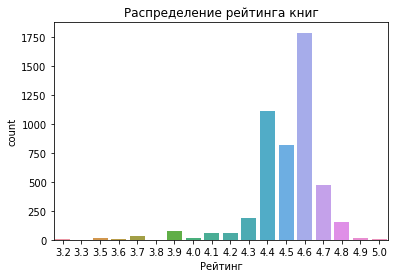

In [22]:
_ = sns.countplot(x = "Рейтинг" , data  = df_train).set_title('Распределение рейтинга книг')

Взглянем на несколько величин сразу

In [23]:
df_train.columns.values

array(['RecordNo', 'Название книги', 'Автор', 'Ссылка на литрес',
       'Рейтинг', 'Количество оценок', 'Количество отзывов',
       'Имя читателя', 'Оценка книги читателем (из 5 баллов)', 'Отзыв',
       'Лайки на отзыв', 'Дислайки на отзыв', 'Релевантность',
       'Таксономия релевантные', 'Таксономия не релевантные',
       'Длина отзыва', 'Ценности', 'len_reviews', 'Соответствие коду',
       'Наличие ценности', 'positive', 'neutral', 'negative', 'skip'],
      dtype=object)

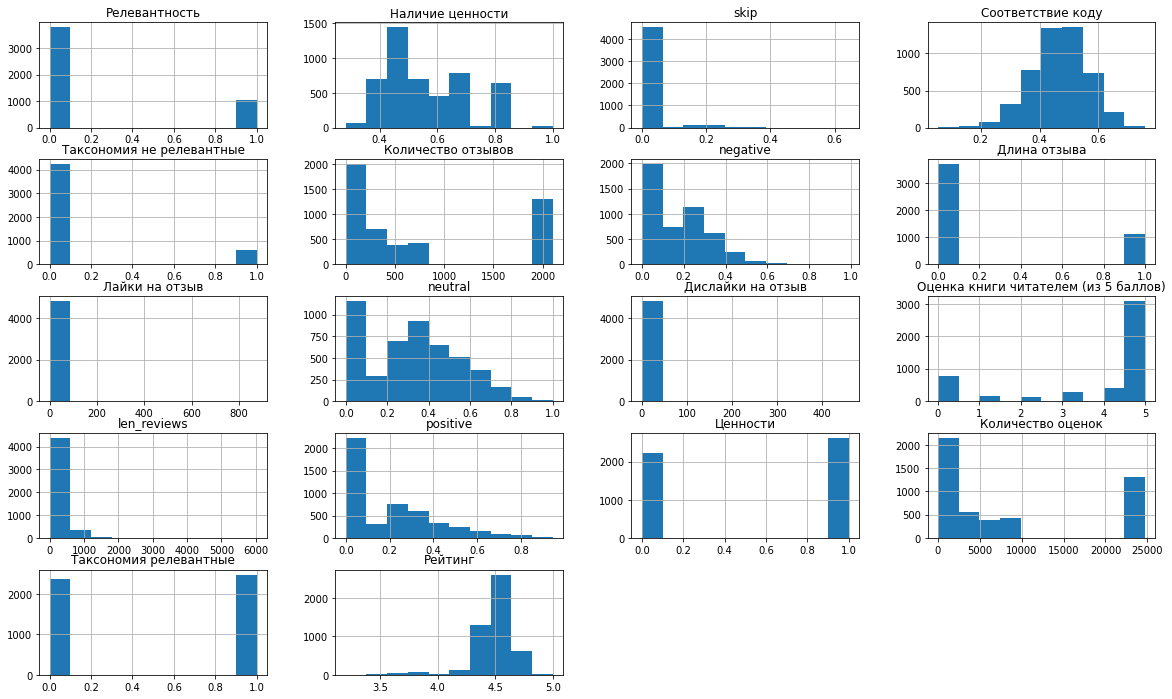

In [24]:
features = list(set(df_train.columns.values) - set(['RecordNo']))

_ = df_train[features].hist(figsize=(20,12))

In [25]:
df_train["Дислайки на отзыв"].value_counts()

0      2304
1      1487
2       320
3       275
4       147
5        79
6        51
7        31
8        28
10       14
13       12
9        11
11        9
12        8
16        7
19        5
14        4
35        4
17        4
15        4
28        3
21        2
18        2
32        2
108       2
22        2
24        2
29        1
117       1
235       1
181       1
459       1
56        1
69        1
37        1
256       1
147       1
317       1
57        1
66        1
91        1
53        1
33        1
20        1
41        1
40        1
23        1
Name: Дислайки на отзыв, dtype: int64

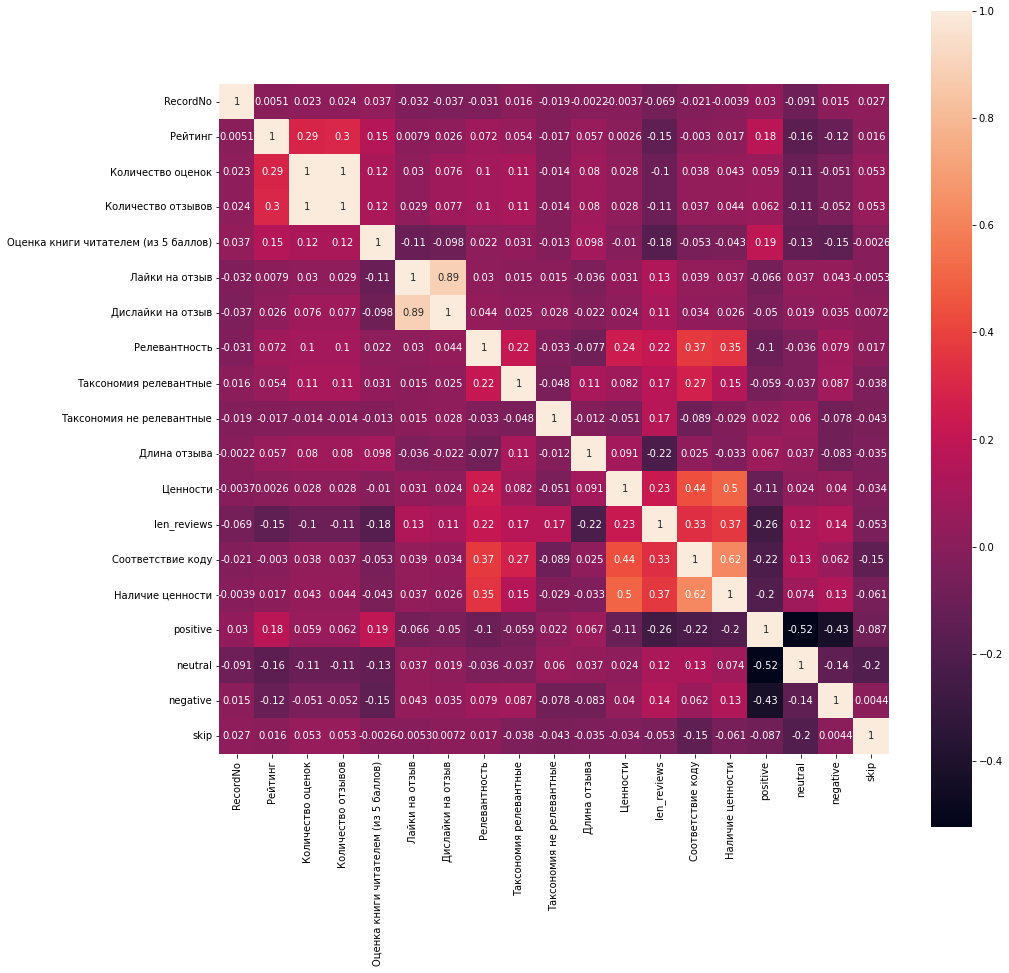

In [26]:
plt.rcParams['figure.figsize']=(15,15)

g = sns.heatmap(df_train.corr(), square = True, annot=True)

## Выделим выборки

In [27]:
mass_label = ['Релевантность',
       'Таксономия релевантные', 'Таксономия не релевантные',
       'Длина отзыва', 'Ценности']

In [28]:
object_label = df_train.dtypes[df_train.dtypes == "object"].index.values
object_label = [ 'Ссылка на литрес','Отзыв' , 'Имя читателя']

In [29]:
cat_cols = ['Название книги', 'Автор']

In [30]:
object_label = np.append(object_label,"RecordNo")

In [31]:
X = df_train.drop(mass_label, axis = 1)
X = X.drop(object_label, axis = 1)

y = df_train[mass_label]

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4839 entries, 0 to 4838
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Название книги                        4839 non-null   object 
 1   Автор                                 4839 non-null   object 
 2   Рейтинг                               4839 non-null   float64
 3   Количество оценок                     4839 non-null   int64  
 4   Количество отзывов                    4839 non-null   int64  
 5   Оценка книги читателем (из 5 баллов)  4839 non-null   float64
 6   Лайки на отзыв                        4839 non-null   int64  
 7   Дислайки на отзыв                     4839 non-null   int64  
 8   len_reviews                           4839 non-null   int64  
 9   Соответствие коду                     4839 non-null   float32
 10  Наличие ценности                      4839 non-null   float64
 11  positive         

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Обучение модели

In [34]:
y_train_v = y_train['Ценности']

In [35]:
y_train_r = y_train['Релевантность']
y_train_tr = y_train['Таксономия релевантные']
y_train_tnr = y_train['Таксономия не релевантные']
y_train_l = y_train['Длина отзыва']

In [36]:
!pip install catboost
from catboost import CatBoostClassifier


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 15 kB/s 


In [37]:
clf_v = CatBoostClassifier(random_state=0,auto_class_weights='Balanced', cat_features=cat_cols, verbose = False)
clf_v.fit(X_train, y_train_v)

In [38]:
X_train.shape

(3871, 15)

In [39]:
y_train_v.shape

(3871,)

In [40]:
X_train_v=X_train.copy()
X_train_v.insert(15,"Ценности предсказанные",y_train_v)

In [41]:
X_train_v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3871 entries, 4641 to 860
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Название книги                        3871 non-null   object 
 1   Автор                                 3871 non-null   object 
 2   Рейтинг                               3871 non-null   float64
 3   Количество оценок                     3871 non-null   int64  
 4   Количество отзывов                    3871 non-null   int64  
 5   Оценка книги читателем (из 5 баллов)  3871 non-null   float64
 6   Лайки на отзыв                        3871 non-null   int64  
 7   Дислайки на отзыв                     3871 non-null   int64  
 8   len_reviews                           3871 non-null   int64  
 9   Соответствие коду                     3871 non-null   float32
 10  Наличие ценности                      3871 non-null   float64
 11  positive       

In [42]:
clf_r = CatBoostClassifier(random_state=0,auto_class_weights='Balanced', cat_features=cat_cols, verbose = False)
clf_r.fit(X_train_v, y_train_r)

clf_tr = CatBoostClassifier(random_state=0,auto_class_weights='Balanced', cat_features=cat_cols, verbose = False)
clf_tr.fit(X_train_v, y_train_tr)

clf_tnr = CatBoostClassifier(random_state=0,auto_class_weights='Balanced', cat_features=cat_cols, verbose = False)
clf_tnr.fit(X_train_v, y_train_tnr)

clf_l = CatBoostClassifier(random_state=0,auto_class_weights='Balanced', cat_features=cat_cols, verbose = False)
clf_l.fit(X_train_v, y_train_l)

## Оценка точности

In [43]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 968 entries, 3199 to 180
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Название книги                        968 non-null    object 
 1   Автор                                 968 non-null    object 
 2   Рейтинг                               968 non-null    float64
 3   Количество оценок                     968 non-null    int64  
 4   Количество отзывов                    968 non-null    int64  
 5   Оценка книги читателем (из 5 баллов)  968 non-null    float64
 6   Лайки на отзыв                        968 non-null    int64  
 7   Дислайки на отзыв                     968 non-null    int64  
 8   len_reviews                           968 non-null    int64  
 9   Соответствие коду                     968 non-null    float32
 10  Наличие ценности                      968 non-null    float64
 11  positive        

In [44]:
#pred = clf.predict(X_test)
pred_v = clf_v.predict(X_test)



In [45]:
X_test.shape

(968, 15)

In [46]:
pred_v.shape

(968,)

In [47]:
X_test_v=X_test.copy()
X_test_v.insert(15,"Ценности предсказанные",pred_v)
pred_r = clf_r.predict(X_test_v)
pred_tr = clf_tr.predict(X_test_v)
pred_tnr = clf_tnr.predict(X_test_v)
pred_l = clf_l.predict(X_test_v)

In [48]:
#pred[:,4]

In [49]:
pred_v.shape

(968,)

In [50]:
#pred[:,4] = pred_v

In [51]:
#pred[:,0] = pred_r
#pred[:,1] = pred_tr
#pred[:,2] = pred_tnr
#pred[:,3] = pred_l

In [52]:
pred=np.array([pred_r,pred_tr,pred_tnr,pred_l,pred_v]).transpose()

#columns = ['Артериальная гипертензия', 'ОНМК', 'Стенокардия, ИБС, инфаркт миокарда', 'Сердечная недостаточность' ,'Прочие заболевания сердца'] 



index = None 

In [53]:
y_test.head(3)

,Релевантность,Таксономия релевантные,Таксономия не релевантные,Длина отзыва,Ценности
3199,0,0,0,0,1
2527,0,0,1,0,0
4100,1,1,0,0,1


In [54]:
#y_test_v = y_test['Ценности']

In [55]:
from sklearn.metrics import recall_score

print("Recall score:", recall_score(y_test, pred, average='macro'))

Recall score: 0.6454979173329678


## Повторное обучение на полном датасете

In [56]:
from sklearn.model_selection import GridSearchCV
parameters_v={'depth':[5,6,7,10]}
parameters={'depth':[5,6,7,10]}

In [57]:
def model_fit(model,X,Y,param,targetname):

  cv = GridSearchCV(model, param_grid=param, n_jobs=-1, scoring='recall', return_train_score=True)
  cv.fit(X, Y, cat_features=cat_cols)

  best_model = cv.best_estimator_
  print(cv.best_params_)

  print(cv.best_score_)

  #for key in cv.cv_results_.keys():
  #  print(key,cv.cv_results_[key][cv.best_index_])

  cv_imp = pd.Series(best_model.get_feature_importance(),X.columns)
  fig, ax = plt.subplots(figsize=(16,14))
  cv_imp.plot.bar(ax=ax)
  ax.set_title("Важность признаков для "+targetname)
  ax.set_ylabel('Важность, %')
  fig.tight_layout()

  return cv

In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4839 entries, 0 to 4838
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Название книги                        4839 non-null   object 
 1   Автор                                 4839 non-null   object 
 2   Рейтинг                               4839 non-null   float64
 3   Количество оценок                     4839 non-null   int64  
 4   Количество отзывов                    4839 non-null   int64  
 5   Оценка книги читателем (из 5 баллов)  4839 non-null   float64
 6   Лайки на отзыв                        4839 non-null   int64  
 7   Дислайки на отзыв                     4839 non-null   int64  
 8   len_reviews                           4839 non-null   int64  
 9   Соответствие коду                     4839 non-null   float32
 10  Наличие ценности                      4839 non-null   float64
 11  positive         

{'depth': 5}
0.719803707742639
{'depth': 6}
0.7079406241616739
{'depth': 6}
0.6881801889866406
{'depth': 10}
0.667786218845795
{'depth': 5}
0.769367802766829


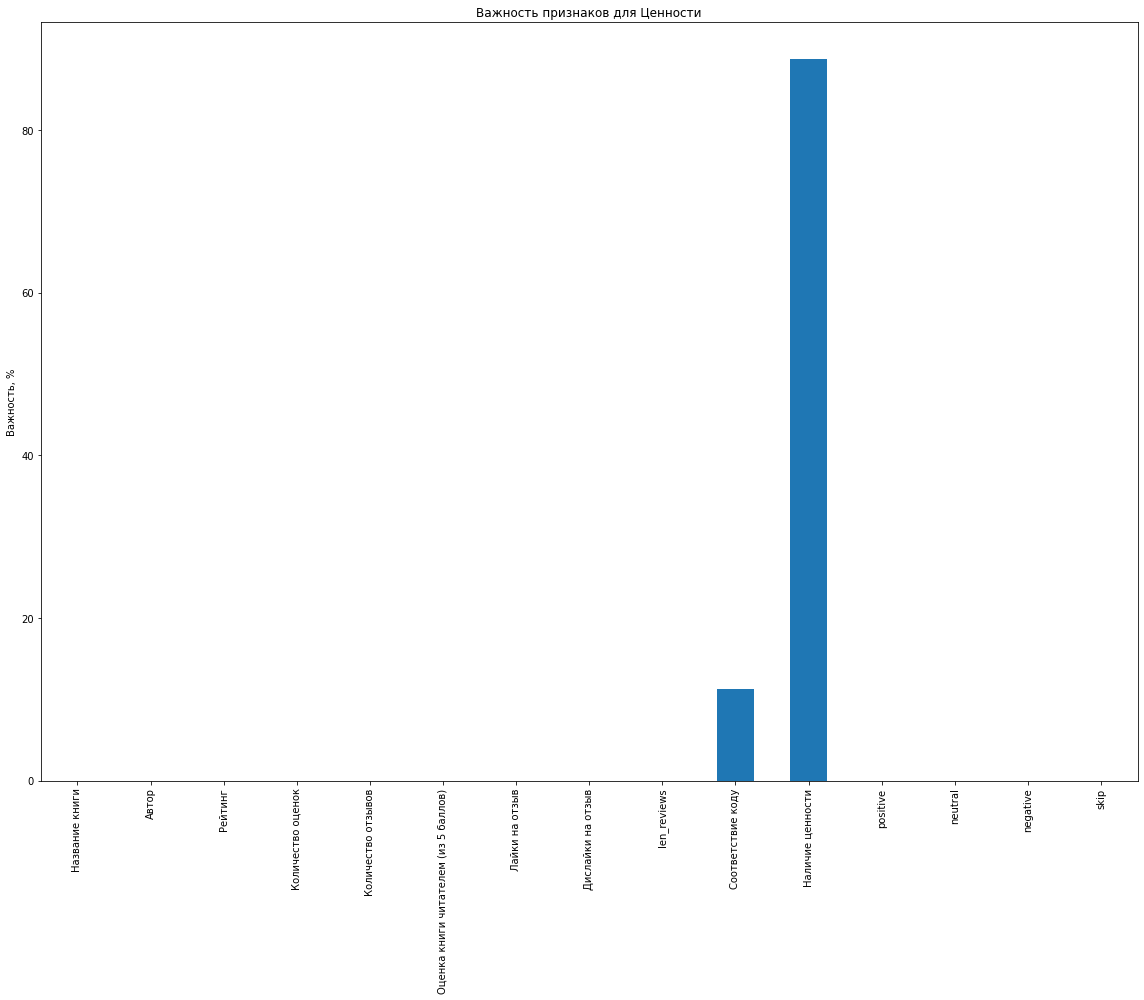

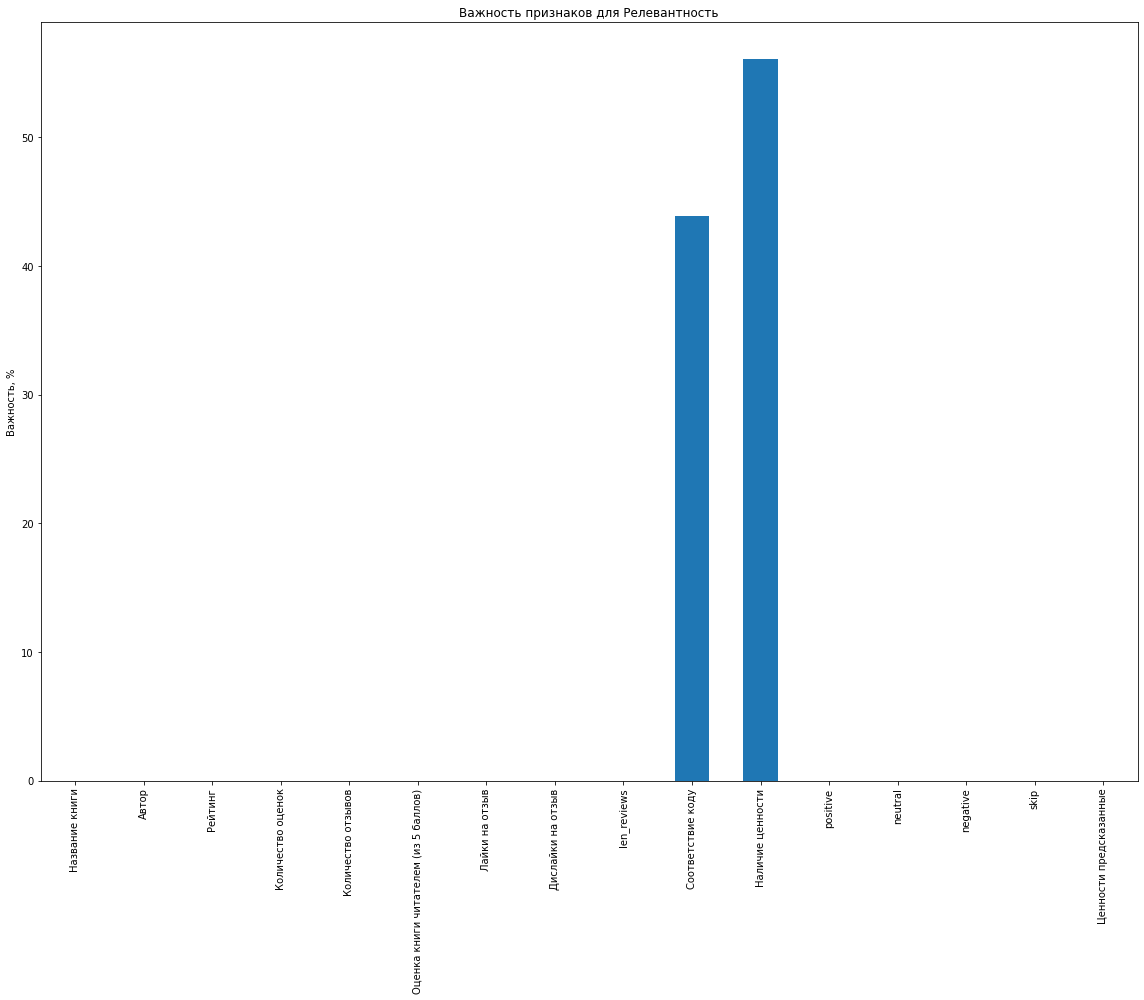

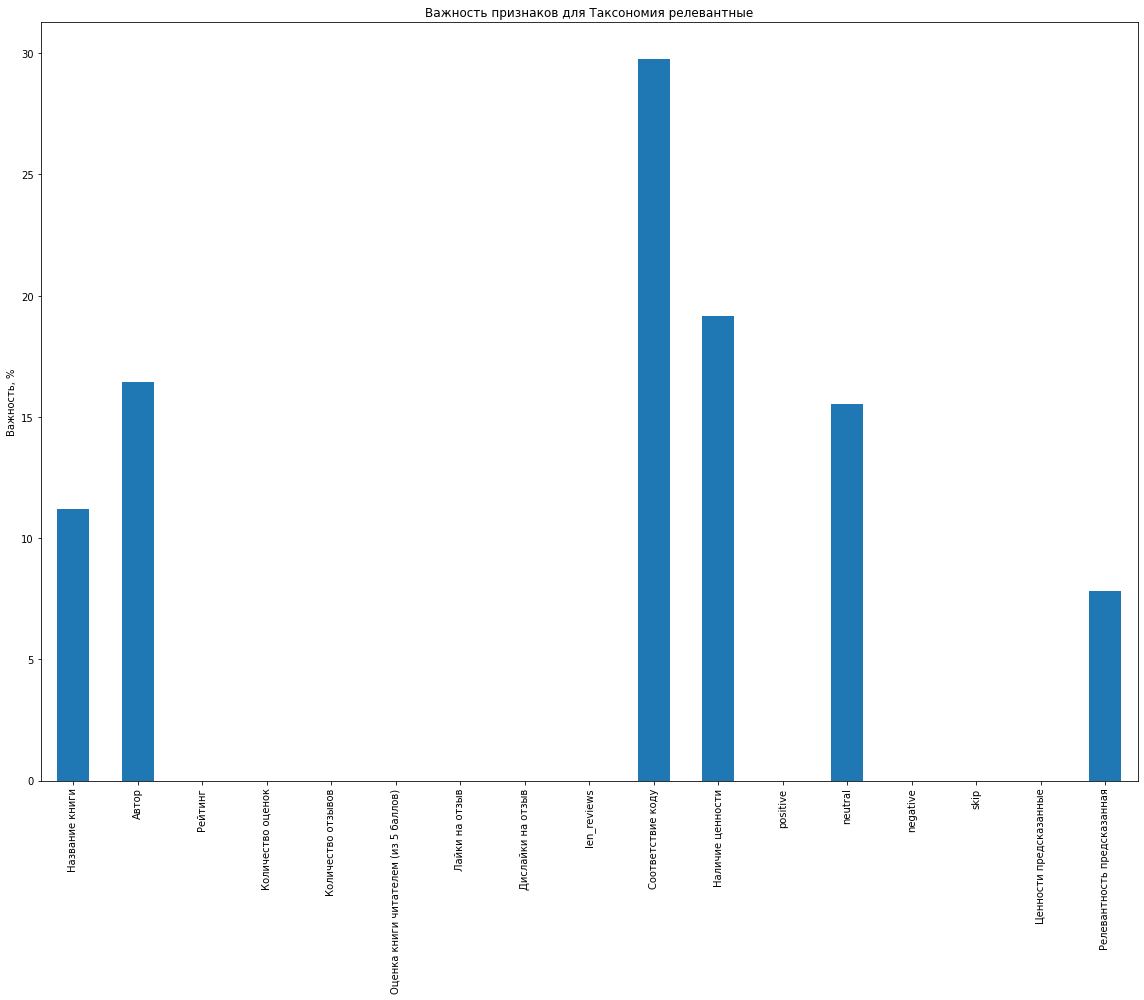

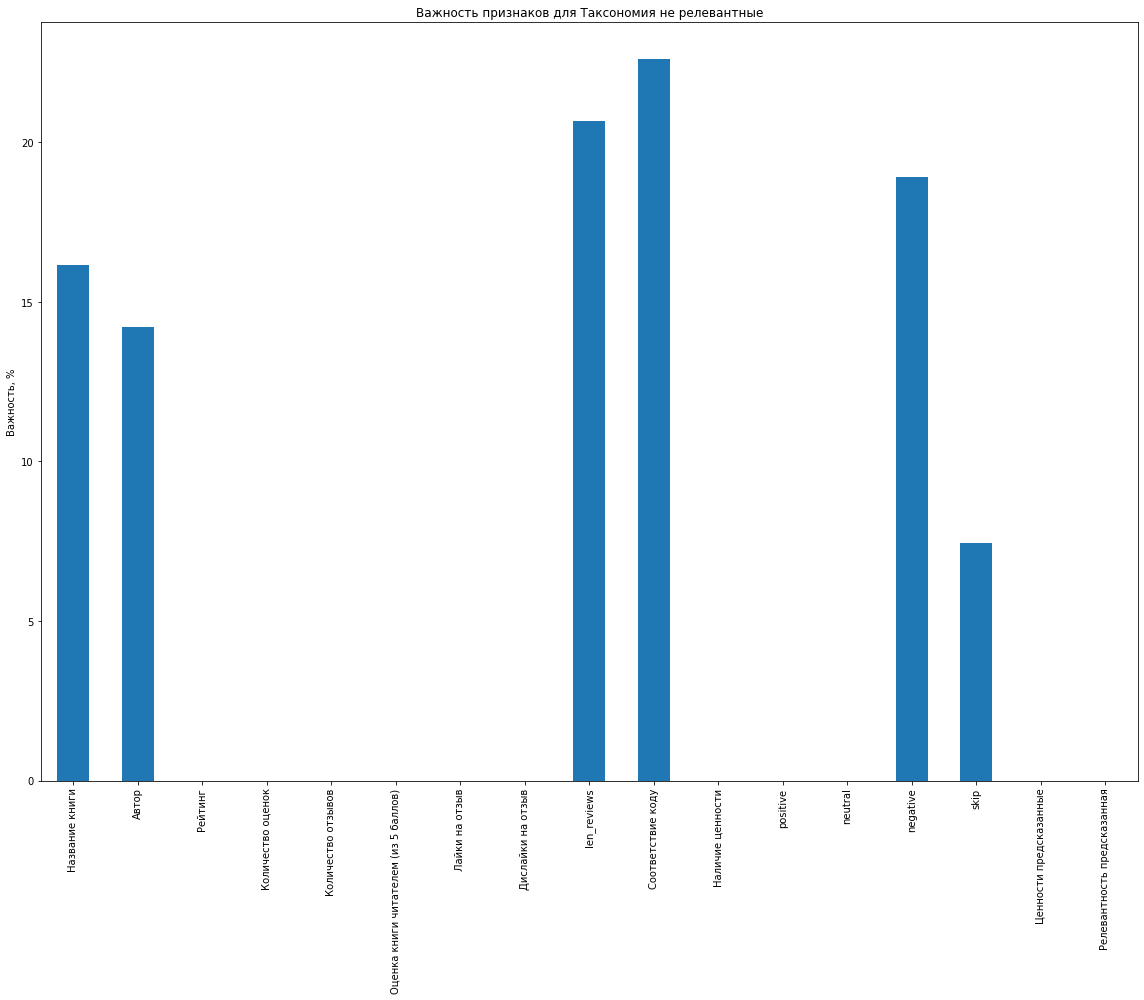

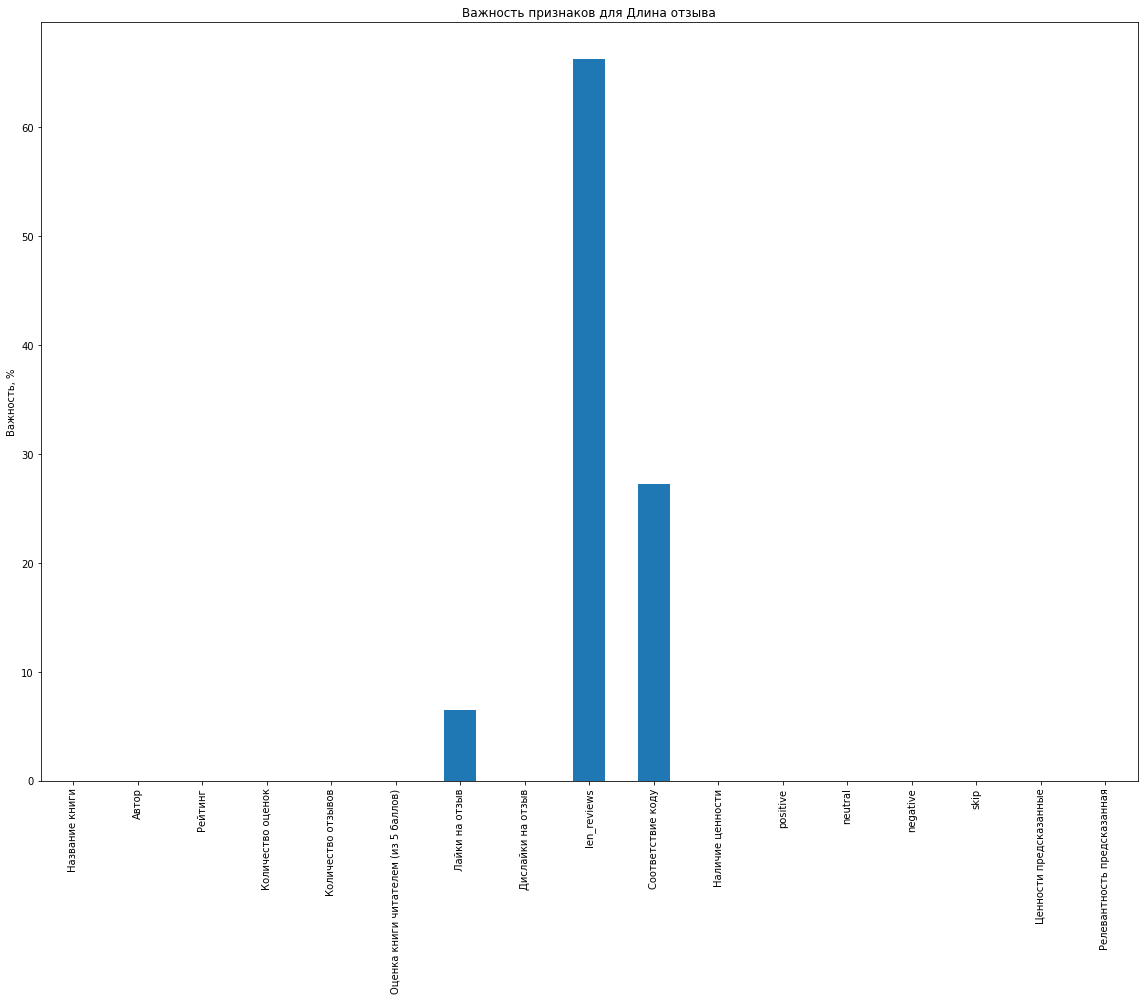

In [59]:
X_train = X
y_train = y

y_train_v = y_train['Ценности']

y_train_r = y_train['Релевантность']
y_train_tr = y_train['Таксономия релевантные']
y_train_tnr = y_train['Таксономия не релевантные']
y_train_l = y_train['Длина отзыва']

clf_v = CatBoostClassifier(random_state=0,auto_class_weights='Balanced', cat_features=cat_cols, boosting_type='Ordered', verbose = False ,ignored_features=[0,1,2,3,4,5,6,7,8,11,12,13,14]) #,ignored_features=[0,2,3,4,5,6,7,11,12,13,14],ignored_features=[1,2,3,4,5,6,7,11,12,13,14]
cv_v=model_fit(clf_v, X_train, y_train_v , parameters_v, 'Ценности')

X_train_v=X_train.copy()
X_train_v.insert(15,"Ценности предсказанные",y_train_v)

clf_r = CatBoostClassifier(random_state=0,auto_class_weights='Balanced', cat_features=cat_cols, boosting_type='Ordered', verbose = False,ignored_features=[0,1,2,3,4,5,6,7,8,11,12,13,14,15])  #,ignored_features=[0]
cv_r = model_fit(clf_r, X_train_v, y_train_r , parameters, 'Релевантность')

X_train_r=X_train_v.copy()
X_train_r.insert(16,"Релевантность предсказанная",y_train_r)

clf_tr = CatBoostClassifier(random_state=0,auto_class_weights='Balanced', cat_features=cat_cols, boosting_type='Ordered', verbose = False,ignored_features=[2,3,4,5,6,7,8,11,13,14,15]) # ,ignored_features=[0]
cv_tr = model_fit(clf_tr, X_train_r, y_train_tr , parameters, 'Таксономия релевантные')

clf_tnr = CatBoostClassifier(random_state=0,auto_class_weights='Balanced', cat_features=cat_cols, boosting_type='Ordered', verbose = False ,ignored_features=[2,3,4,5,6,7,10,11,12,15,16]) # ,ignored_features=[0,2,3,4,5,6,7,13,14]
cv_tnr=model_fit(clf_tnr, X_train_r, y_train_tnr , parameters, 'Таксономия не релевантные')

clf_l = CatBoostClassifier(random_state=0,auto_class_weights='Balanced', cat_features=cat_cols, boosting_type='Ordered', verbose = False ,ignored_features=[0,1,2,3,4,5,7,10,11,12,13,14,15,16]) # ,ignored_features=[0] ,ignored_features=[0,2,3,4,5,6,7,11,13,14]
cv_l = model_fit(clf_l, X_train_r, y_train_l , parameters,'Длина отзыва')

In [60]:
X_train_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4839 entries, 0 to 4838
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Название книги                        4839 non-null   object 
 1   Автор                                 4839 non-null   object 
 2   Рейтинг                               4839 non-null   float64
 3   Количество оценок                     4839 non-null   int64  
 4   Количество отзывов                    4839 non-null   int64  
 5   Оценка книги читателем (из 5 баллов)  4839 non-null   float64
 6   Лайки на отзыв                        4839 non-null   int64  
 7   Дислайки на отзыв                     4839 non-null   int64  
 8   len_reviews                           4839 non-null   int64  
 9   Соответствие коду                     4839 non-null   float32
 10  Наличие ценности                      4839 non-null   float64
 11  positive         

In [61]:
print('Ценности')
print(cv_v.best_params_)
print(cv_v.best_score_)
print('Релевантность')
print(cv_r.best_params_)
print(cv_r.best_score_)
print('Таксономия релевантные')
print(cv_tr.best_params_)
print(cv_tr.best_score_)
print('Таксономия нерелевантные')
print(cv_tnr.best_params_)
print(cv_tnr.best_score_)
print('Длина отзыва')
print(cv_l.best_params_)
print( cv_l.best_score_)

Ценности
{'depth': 5}
0.719803707742639
Релевантность
{'depth': 6}
0.7079406241616739
Таксономия релевантные
{'depth': 6}
0.6881801889866406
Таксономия нерелевантные
{'depth': 10}
0.667786218845795
Длина отзыва
{'depth': 5}
0.769367802766829


## Получение сабмита

In [62]:
#df_test["len_reviews"] = df_test["Отзыв"].map(len)

#df_test["Автор"] = pd.Categorical(df_test["Автор"])
#df_test["Автор"].astype('category').cat.codes
#df_test["Автор"] = df_test["Автор"].cat.codes

#df_test["Соответствие коду"] = df_test["Отзыв"].apply(get_culturalcode)
#df_test["Наличие ценности"] = df_test["Отзыв"].apply(get_value)

#df_test.fillna(0)

df_test = add_features(df_test)

In [63]:
# Проводим анализ тональности 
rez=[]

for index, rows  in tqdm(df_test.iterrows()):
    
        messages=[]
        messages.append(rows['Отзыв'])
        results = model.predict(messages, k=2)
        for message, sentiment in zip(messages, results):
            # сразу выводим результат
            neutral = 0
            positive=0
            negative=0
            skip=0
            if 'neutral' in sentiment:
                neutral = sentiment['neutral']
            if 'positive' in sentiment:
                positive = sentiment['positive']
            if 'negative' in sentiment:
                negative = sentiment['negative']
            if 'skip' in sentiment:
                skip = sentiment['skip']
            rez.append([rows['RecordNo'], positive, neutral, negative, skip])
            #print (sentiment)

df_test_dostoevsky = pd.DataFrame(rez ,columns=['RecordNo', 'positive', 'neutral', 'negative','skip'])  

df_test = df_test.merge(df_test_dostoevsky, on='RecordNo',  how='left' )

2075it [00:01, 1083.70it/s]


In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RecordNo                              2075 non-null   int64  
 1   Название книги                        2075 non-null   object 
 2   Автор                                 2075 non-null   object 
 3   Ссылка на литрес                      2075 non-null   object 
 4   Рейтинг                               2075 non-null   float64
 5   Количество оценок                     2075 non-null   int64  
 6   Количество отзывов                    2075 non-null   int64  
 7   Имя читателя                          2075 non-null   object 
 8   Оценка книги читателем (из 5 баллов)  2075 non-null   float64
 9   Отзыв                                 2075 non-null   object 
 10  Лайки на отзыв                        2075 non-null   int64  
 11  Дислайки на отзыв

In [65]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RecordNo                              2075 non-null   int64  
 1   Название книги                        2075 non-null   object 
 2   Автор                                 2075 non-null   object 
 3   Ссылка на литрес                      2075 non-null   object 
 4   Рейтинг                               2075 non-null   float64
 5   Количество оценок                     2075 non-null   int64  
 6   Количество отзывов                    2075 non-null   int64  
 7   Имя читателя                          2075 non-null   object 
 8   Оценка книги читателем (из 5 баллов)  2075 non-null   float64
 9   Отзыв                                 2075 non-null   object 
 10  Лайки на отзыв                        2075 non-null   int64  
 11  Дислайки на отзыв

In [66]:
#X = df_test.drop(mass_label, axis = 1)
RecordNo = df_test['RecordNo']
x_valid = df_test.drop(object_label, axis = 1)

x_valid.fillna(0)



,Название книги,Автор,Рейтинг,Количество оценок,Количество отзывов,Оценка книги читателем (из 5 баллов),Лайки на отзыв,Дислайки на отзыв,len_reviews,Соответствие коду,Наличие ценности,positive,neutral,negative,skip
0,Дети мои,Гузель Яхина,4.4,8032,702,5.0,2,0,181,0.578474,0.837881,0.187143,0.384922,0.000000,0.0
1,Текст,Дмитрий Глуховский,4.5,1923,246,5.0,1,0,219,0.445461,0.450798,0.407343,0.262852,0.000000,0.0
2,Текст,Дмитрий Глуховский,4.4,7276,622,5.0,0,0,390,0.460698,0.674867,0.000000,0.476590,0.307368,0.0
3,Зулейха открывает глаза,Гузель Яхина,4.6,24719,2103,0.0,4,0,280,0.429618,0.442658,0.000000,0.592677,0.217348,0.0
4,Зулейха открывает глаза,Гузель Яхина,4.6,24719,2103,0.0,0,1,136,0.446628,0.646124,0.562187,0.000000,0.112805,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,Зулейха открывает глаза,Гузель Яхина,4.6,24719,2103,5.0,0,1,243,0.441433,0.620840,0.222710,0.256842,0.000000,0.0
2071,Дети мои,Гузель Яхина,4.4,8032,702,4.0,0,0,186,0.355844,0.395649,0.281416,0.000000,0.201823,0.0
2072,Зулейха открывает глаза,Гузель Яхина,4.6,24719,2103,5.0,0,1,324,0.602169,0.701527,0.228166,0.182436,0.000000,0.0
2073,С неба упали три яблока,Наринэ Абгарян,4.8,1455,189,5.0,0,0,217,0.586561,0.485680,0.228166,0.233716,0.000000,0.0


In [67]:
x_valid=x_valid.fillna(0.0)

In [68]:
x_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Название книги                        2075 non-null   object 
 1   Автор                                 2075 non-null   object 
 2   Рейтинг                               2075 non-null   float64
 3   Количество оценок                     2075 non-null   int64  
 4   Количество отзывов                    2075 non-null   int64  
 5   Оценка книги читателем (из 5 баллов)  2075 non-null   float64
 6   Лайки на отзыв                        2075 non-null   int64  
 7   Дислайки на отзыв                     2075 non-null   int64  
 8   len_reviews                           2075 non-null   int64  
 9   Соответствие коду                     2075 non-null   float32
 10  Наличие ценности                      2075 non-null   float64
 11  positive         

In [69]:
best_model_v = cv_v.best_estimator_
best_model_r = cv_r.best_estimator_
best_model_tr = cv_tr.best_estimator_
best_model_tnr = cv_tnr.best_estimator_
best_model_l = cv_l.best_estimator_

In [70]:
#pred=clf.predict(x_valid)
pred_v=best_model_v.predict(x_valid)
#pred[:,4] = pred_v

In [71]:
x_valid.shape

(2075, 15)

In [72]:
pred_v.shape

(2075,)

In [73]:
x_valid_v=x_valid.copy()
x_valid_v.insert(15,"Ценности предсказанные",pred_v)
pred_r = best_model_r.predict(x_valid_v)
x_valid_r=x_valid_v.copy()
x_valid_r.insert(16,"Релевантность предсказанная",pred_r)

In [74]:
pred_tr = best_model_tr.predict(x_valid_r)
pred_tnr = best_model_tnr.predict(x_valid_r)
pred_l = best_model_l.predict(x_valid_r)

In [75]:
#pred[:,0] = pred_r

#pred[:,1] = pred_tr
#pred[:,2] = pred_tnr
#pred[:,3] = pred_l

In [76]:
targets=np.array([pred_r,pred_tr,pred_tnr,pred_l,pred_v]).transpose()





index = None 
#df = pd.DataFrame(targets, index, columns)

In [77]:
df_pred = pd.DataFrame(targets, columns = ['Релевантность','Таксономия релевантные','Таксономия не релевантные','Длина отзыва','Ценности'])

In [78]:
df_pred.insert(0,'RecordNo',RecordNo)


In [79]:
df_pred.to_csv('/content/drive/MyDrive/hacks_ai_2022/Вологда/solution.csv',index=False)